# Data Wrangling

Estimated time needed: **30** minutes

## Objectives

- Handle missing values
- Correct data format
- Standardize and normalize data

## Table of Contents

- [Heading 1](#heading-1)

---

## Video Lessons

- <img src="https://user-images.githubusercontent.com/95575665/168158125-0d826c1a-ffea-4ea9-a2bc-f3b0f4f0b99a.png" alt="youtube-logo.png" width="15" height="10"> [Pre-processing Data in Python](https://www.youtube.com/watch?v=DkeN-0LD-Jo)
- <img src="https://user-images.githubusercontent.com/95575665/168158125-0d826c1a-ffea-4ea9-a2bc-f3b0f4f0b99a.png" alt="youtube-logo.png" width="15" height="10"> [Dealing with Missing Values in Python](https://www.youtube.com/watch?v=x-Zo4InbFdE)
- <img src="https://user-images.githubusercontent.com/95575665/168158125-0d826c1a-ffea-4ea9-a2bc-f3b0f4f0b99a.png" alt="youtube-logo.png" width="15" height="10"> [Data Formatting in Python](https://www.youtube.com/watch?v=7hogMjvAL_w)
- <img src="https://user-images.githubusercontent.com/95575665/168158125-0d826c1a-ffea-4ea9-a2bc-f3b0f4f0b99a.png" alt="youtube-logo.png" width="15" height="10"> [Data Normalization in Python](https://www.youtube.com/watch?v=QU29qVz-xZk)
- <img src="https://user-images.githubusercontent.com/95575665/168158125-0d826c1a-ffea-4ea9-a2bc-f3b0f4f0b99a.png" alt="youtube-logo.png" width="15" height="10"> [Binning in Python](https://www.youtube.com/watch?v=ultQxWJn080)
- <img src="https://user-images.githubusercontent.com/95575665/168158125-0d826c1a-ffea-4ea9-a2bc-f3b0f4f0b99a.png" alt="youtube-logo.png" width="15" height="10"> [Indicator Variables in Python](https://www.youtube.com/watch?v=aBPiCvJj9JI)

---

## Dataset

We will be using the following dataset.

- Data source: [imports-85.data](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data) or [auto.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv)
- Data type: .data or CSV

In [1]:
## Data file in .data format stored on the internet
# filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
## Data file in .csv format stored on the internet
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

## Setup

In [2]:
## Install libraries using piplite when running the notebook in browser
# import piplite
# await piplite.install(['pandas'])
# await piplite.install(['matplotlib'])

If the notebook is run locally using Anaconda, uncomment the following cell to load the correct libraries and versions.

In [3]:
## Install a specific version of libraries locally with Anaconda
# !mamba install pandas==1.3.3
# !mamba install numpy=1.21.2

This function will download the dataset into our browser.

In [4]:
## Download dataset into browser
# from pyodide.http import pyfetch

# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())

We will need to download the [dataset](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv) if we run the notebook locally. Please comment out the following cell.

In [5]:
# await download(filename, "auto.csv")
# filename = "auto.csv"

## Part 01: Pre-processing Data in Python

### Data Wrangling

Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
## Show graphs inline
%matplotlib inline

### Reading Dataset from URL

First, we assign the URL of the dataset to `filename`, which has been done.

Then, we create a Python list of column names.

In [8]:
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels","engine-location","wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

Use the Pandas method `read_csv()` to load the data from the web address. We can set the column names with the parameter `names` (i.e. the `headers` list above).

In [9]:
## Load the data file with column names
df = pd.read_csv(filename, names=headers)

To see what the data set looks like, we will use the `head()` method to display the first N rows of the DataFrame.

In [10]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Part 02: Dealing with Missing Values in Python

### Identify and Handle Missing Values

Several question marks appeared in the dataframe; those are missing values which may hinder our further analysis. So, how do we identify all those missing values and deal with them?

Steps for working with missing data:

- Identify missing data
- Deal with missing data
- Correct data format

#### Identify Missing Values

Convert "?" to NaN. 

In the car dataset, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Here we use the function: 
```
replace(A, B, inplace=True)
```
to replace A by B.

In [11]:
## Replace "?" with NaN
df.replace("?", np.nan, inplace=True)
## Check if replaced
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##### Evaluating Missing Data

The missing values are converted by default. We use the following functions to identify these missing values. There are 2 methods to detect missing data:

- `isnull()`
- `notnull()`

The output is a Boolean value indicating whether the value that is passed into the argument is in fact missing data. `True` means the value is a missing value while `False` means the value is not a missing value.

In [12]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### Count Missing Values in Each Column

Using a for-loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset. In the body of the for-loop, the method `value_counts()` counts the number of "True" values.

In [13]:
for column in missing_data.columns.values.tolist():
	print(column)
	print (missing_data[column].value_counts())
	print()

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data and 7 of the columns containing missing data:

- `normalized-losses`: 41 missing data
- `num-of-doors`: 2 missing data
- `bore`: 4 missing data
- `stroke`: 4 missing data
- `horsepower`: 2 missing data
- `peak-rpm`: 2 missing data
- `price`: 4 missing data

#### Handle Missing Data

How to deal with missing data?

<ol>
	<li>Drop data
		<ol type="a">
			<li>Drop the entire row</li>
			<li>Drop the entire column</li>
		</ol>
	</li>
	<li>Replace data
		<ol type="a">
			<li>Replace it with mean (for numeric values)</li>
			<li>Replace it with the top value (most frequently occurred value) (for categorical values)</li>
			<li>Replace it based on other functions</li>
		</ol>
	</li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.

We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to different columns.

1. Replace by mean

- `normalized-losses`: 41 missing data
- `bore`: 4 missing data
- `stroke`: 4 missing data
- `horsepower`: 2 missing data
- `peak-rpm`: 2 missing data

2. Replace by the top value

- `num-of-doors`: 2 missing data
  - Replaced with "four"
    - Reason: 84% of sedans is four doors. Since four doors is most frequent, it is most likely to occur.

3. Drop the whole row

- `price`: 4 missing data
  - Simply delete the whole row
    - Reason: Price is what we want to predict. Any data entry without price data cannot be used for prediction. Therefore, any row without price data is not useful to us.

Calculate the mean value for the "normalized-losses" column

In [14]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


Replace "NaN" with mean value in "normalized-losses" column

In [15]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

Calculate the mean value for the "bore" column

In [16]:
avg_bore = df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810957


Replace "NaN" with the mean value in the "bore" column

In [17]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

1. Based on the example above, replace `NaN` in "stroke" column with the mean value.

In [18]:
avg_stroke = df["stroke"].astype('float').mean(axis=0)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

<details><summary>Click here for the solution</summary>

```python
# Calculate the mean vaule for "stroke" column
avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("Average of stroke:", avg_stroke)

# Replace NaN by mean value in "stroke" column
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
```

</details>

Calculate the mean value for the "horsepower" column

In [19]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average of horsepower:", avg_horsepower)

Average of horsepower: 104.25615763546799


Replace "NaN" with the mean value in the "horsepower" column

In [20]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Calculate the mean value for "peak-rpm" column

In [21]:
avg_peakrpm = df['peak-rpm'].astype('float').mean(axis=0)
print("Average of peak RPM:", avg_peakrpm)

Average of peak RPM: 5125.369458128079


Replace "NaN" with the mean value in the "peak-rpm" column

In [22]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

To see which values are present in a particular column, we can use the `value_counts()` method.

In [23]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

We can see that four doors is the most common type. We can also use the `idxmax()` method to calculate the most common type automatically.

In [24]:
df['num-of-doors'].value_counts().idxmax()

'four'

The replacement procedure is very similar to what we have seen previously.

In [25]:
# Replace the missing values in "num-of-doors" by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Finally, let's drop all rows that do not have price data.

In [26]:
# Simply drop the entire row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# Reset index as we have droped rows
df.reset_index(drop=True, inplace=True)

In [27]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now, we have a dataset with no missing values.

## Part 03: Data Formatting in Python

### Correct Data Format

The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other). In Pandas, we use:

- `dtypes` to check the data type
- `astype()` to change the data type

Let's list the data types for each column.

In [28]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see above, some columns are not of the correct data type. Numerical variables should be of type "float" or "int" and variables with strings such as categories should have type "object". For example, "bore" and "stroke" variables are numerical values that describe the engines so we should expect them to be of the type "float" or "int". However, they are shown as type "object". We have to convert data types into a proper format for each column using the `astype()` method.

In [29]:
## Convert data Types to proper format
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
## Check if data types changed
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.

### Data Standardization

Data is usually collected from different agencies in different formats. That's why we need to standardize these variables to enable fairer comparison.

What is standardization?

Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison. Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.

**Example**

Transform mpg to L/100km

In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accepts the fuel consumption with L/100km standard. We will need to apply data transformation to transform mpg into L/100km. The formula for unit conversion is: $L/100km = 235 \div mpg$.

We can do many mathematical operations directly in Pandas.

In [30]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [31]:
## Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235 / df["city-mpg"]
## Check transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


2. According to the example above, transform "mpg" to "L/100km" in the column of "highway-mpg" and change the name of column to "highway-L/100km".

In [32]:
df["highway-L/100km"] = 235 / df["highway-mpg"]

<details><summary>Click here for the solution</summary>

```python
# Transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235 / df["highway-mpg"]

# Rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# Check your transformed data 
df.head()
```

</details>

## Part 04: Data Normalization in Python

### Data Normalization

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.

**Example**

To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".
- Target: to normalize these variables so their values range from 0 to 1
- Approach: replace original value by $Original\ value \div Maximum\ value$

In [33]:
## Replace original value by (original value)/(maximum value)
df['length'] = df['length'] / df['length'].max()
df['width'] = df['width'] / df['width'].max()

3. According to the example above, normalize the column "height".

In [34]:
df['height'] = df['height'] / df['height'].max()

<details><summary>Click here for the solution</summary>

```python
df['height'] = df['height'] / df['height'].max() 
```

</details>

In [35]:
## Show the scaled columns
df[["length", "width", "height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Here we have normalized "length", "width" and "height" in the range of [0, 1].

## Part 05: Binning in Python

### Binning

Binning is a process of transforming continuous numerical variables into discrete categorical "bins" for grouped analysis.

**Example**

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into 3 "bins" to simplify analysis? We will use the Pandas method `cut()` to segment the "horsepower" column into 3 bins.

#### Example of Binning Data in Pandas

Convert data to correct format.

In [36]:
df["horsepower"] = df["horsepower"].astype(int, copy=True)

Let's plot the histogram of "horsepower" to see its distribution.

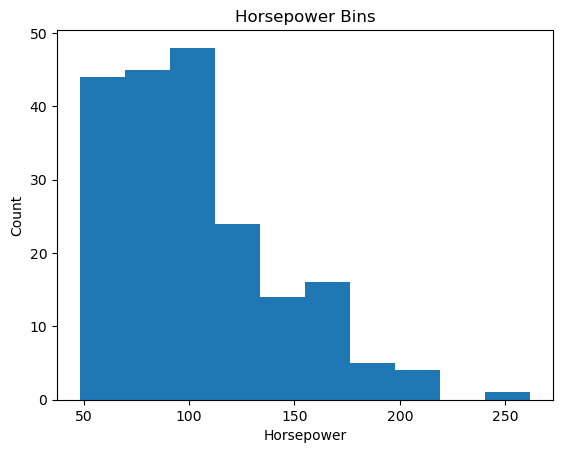

In [37]:
## Plot histogram of a column
plt.hist(df["horsepower"])
## Set plot title
plt.title("Horsepower Bins")
## Set x/y labels 
plt.xlabel("Horsepower")
plt.ylabel("Count")
## Display all open figures
plt.show()

We would like 3 bins of equal size bandwidth so we use numpy's `linspace(start_value, end_value, numbers_generated)` function.

Since we want to include the minimum value of horsepower, we want to set `start_value=min(df["horsepower"])`. Since we want to include the maximum value of horsepower, we want to set `end_value=max(df["horsepower"])`. Since we are building 3 bins of equal length, there should be 4 dividers so `numbers_generated=4`.

We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.

In [38]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
print(bins)

[ 48.         119.33333333 190.66666667 262.        ]


In [39]:
## Set group names
group_names = ['Low', 'Medium', 'High']

We apply the function `cut()` to determine what each value of `df['horsepower']` belongs to.

In [40]:
df['horsepower_binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
df[['horsepower', 'horsepower_binned']].head(20)

,horsepower,horsepower_binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Let's see the number of vehicles in each bin.

In [41]:
df["horsepower_binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower_binned, dtype: int64

Let's plot the distribution of each bin.

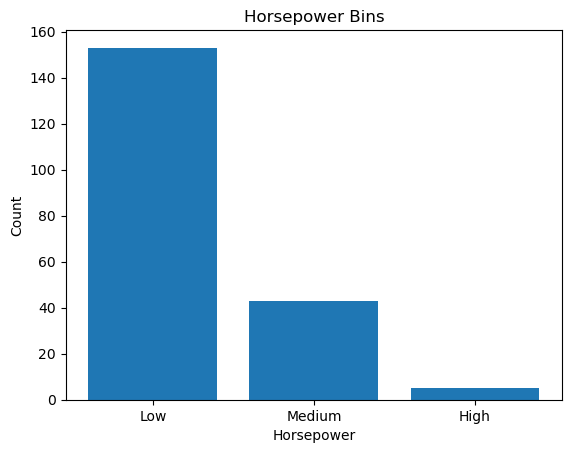

In [42]:
## Make a bar plot
plt.bar(group_names, df["horsepower_binned"].value_counts())
## Set plot title
plt.title("Horsepower Bins")
## Set x/y labels 
plt.xlabel("Horsepower")
plt.ylabel("Count")
## Display all open figures
plt.show()

Look at the DataFrame above carefully. The last column provides the bins for "horsepower" based on 3 categories - "Low", "Medium" and "High". 
We successfully narrowed down the intervals from 59 to 3!

#### Bins Visualization

Normally, a histogram is used to visualize the distribution of bins created above. 

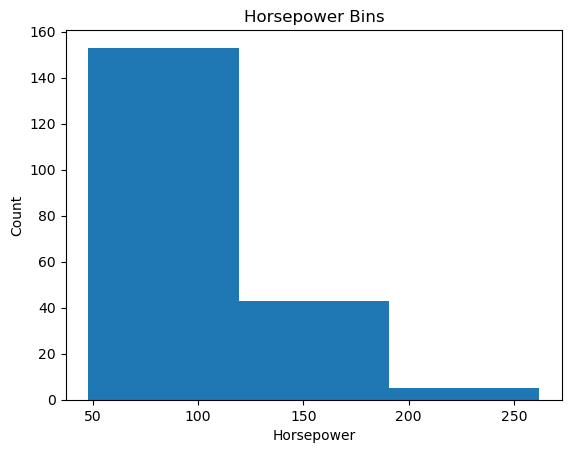

In [43]:
## Plot historgram of "horsepower" with 3 bins
plt.hist(df["horsepower"], bins=3)
## Set plot title
plt.title("Horsepower Bins")
## Set x/y labels 
plt.xlabel("Horsepower")
plt.ylabel("Count")
## Display all open figures
plt.show()

The plot above shows the binning result for the attribute "horsepower".

## Part 06: Turning Categorical Variables into Quantitative Variables in Python

### Indicator or Dummy Variable

What is an indicator variable?

An indicator variable (or *dummy variable*) is a numerical variable used to label categories. They are called "dummies" because the numbers themselves do not have inherent meaning. 

Why we use indicator variables?

We use indicator variables so we can use categorical variables for regression analysis in the later modules.

**Example**

We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression does not understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.

We will use Pandas' `get_dummies()` method to assign numerical values to different categories of fuel type. 

In [44]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower_binned'],
      dtype='object')

In [45]:
## Convert categorical variable into dummy/indicator variables
dummies_ft = pd.get_dummies(df["fuel-type"])
dummies_ft.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [46]:
## Rename columns
dummies_ft.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummies_ft.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In the DataFrame, column "fuel-type" has values for "gas" and "diesel" as 0s and 1s now.

In [47]:
## Merge dummy variables into the main DataFrame
df = pd.concat([df, dummies_ft], axis=1)
## Drop original column "fuel-type" from "df"
df.drop("fuel-type", axis=1, inplace=True)

In [48]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower_binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1


The last 2 columns are now the indicator variable representation of the fuel-type variable. They are all 0s and 1s now.

4. Similar to before, create an indicator variable for the column "aspiration".

In [49]:
## Convert categorical variable into dummy/indicator variables
dummies_asp = pd.get_dummies(df["aspiration"])
print(dummies_asp.head())
## Rename columns
dummies_asp.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
print(dummies_asp.head())

   std  turbo
0    1      0
1    1      0
2    1      0
3    1      0
4    1      0
   aspiration-std  aspiration-turbo
0               1                 0
1               1                 0
2               1                 0
3               1                 0
4               1                 0


<details><summary>Click here for the solution</summary>

```python
# Get indicator variables of "aspiration"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# Change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# Show first 5 instances of DataFrame
dummy_variable_2.head()
```

</details>

5. Merge the new DataFrame to the original DataFrame, then drop the column "aspiration".

In [50]:
## Merge dummy variables into the main DataFrame
df = pd.concat([df, dummies_asp], axis=1)
## Drop original column "fuel-type" from "df"
df.drop("aspiration", axis=1, inplace=True)

<details><summary>Click here for the solution</summary>

```python
# Merge the new DataFrame to the original DataFrame
df = pd.concat([df, dummy_variable_2], axis=1)

# Drop original column "aspiration" from "df"
df.drop('aspiration', axis=1, inplace=True)
```

</details>

Save cleaned data to a new CSV.

In [51]:
df.to_csv('cleaned-automobile.csv')

NOTE: The CSV file cannot be viewed in the jupyterlite-based SN labs environment. Click [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/DA0101EN-2-Review-Data-Wrangling.ipynb) to download the notebook (.ipynb) to your local machine and view the CSV file once the notebook is executed.

---

Author(s):

- [Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136)

Contributor(s):

- [Mahdi Noorian PhD](https://www.linkedin.com/in/mahdi-noorian-58219234)
- Bahare Talayian
- Eric Xiao
- Steven Dong
- Parizad
- Hima Vasudevan
- [Fiorella Wenver](https://www.linkedin.com/in/fiorellawever)
- [Yi Yao](https://www.linkedin.com/in/yi-leng-yao-84451275)